# Install 

Please select a proper version from [Download Files](https://pypi.org/project/pyswEOS/#files) according to python version (e.g. 2.7, 3.8, 3.9) and operation system (macosx, linux, windows). The download file pattern is `pyswEOS-version-pythonVersion-none-OSVersion.whl`. For example, if your python version is 3.7 (or maybe 3.7.x, 3.7m, ...) and OS is windows 10, please copy the link of :code:`pyswEOS-0.2.6-py3.7-none-win_amd64.whl` and then use pip to install, :code:`pip install https://****.whl`.

**Check python version**

In [ ]:
!python --version

**Check system version**

In [ ]:
!uname -a

**Install latest version of pyswEOS**

Maybe need to replace the link after `pip install` by the latest version.

In [ ]:
#install
!pip install https://files.pythonhosted.org/packages/a2/8e/e29dbbb95058b8fef7f10b388c4fbc07afd72fc5f4ec45f11dec81999140/pyswEOS-0.2.5-py3.7-none-manylinux2010_x86_64.whl

## Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string
import pyswEOS
print(pyswEOS.__version__)

from pyswEOS import H2ONaCl
from pyswEOS import H2O
water=H2O.cH2O()
sw=H2ONaCl.cH2ONaCl()

AttributeError: module 'pyswEOS' has no attribute '__version__'

### Calculate properties in p-T space with constant X

In [67]:
p=np.linspace(5,800,200)
T=np.linspace(5,1000,250)
x0=0.2
pp,TT=np.meshgrid(p,T)
prop={'Region':np.zeros_like(pp),'Mu':np.zeros_like(pp),
      'Rho':np.zeros_like(pp), 'Rho_l':np.zeros_like(pp), 'Rho_v':np.zeros_like(pp), 'Rho_h':np.zeros_like(pp), 
      'H':np.zeros_like(pp), 'H_l':np.zeros_like(pp), 'H_v':np.zeros_like(pp), 'H_h':np.zeros_like(pp), 
      'S_l':np.zeros_like(pp), 'S_v':np.zeros_like(pp), 'S_h':np.zeros_like(pp), 
      'X_l':np.zeros_like(pp), 'X_v':np.zeros_like(pp)}
rho=np.zeros_like(pp)
for i in range(0,pp.shape[0]):
    for j in range(0,pp.shape[1]):
        Prop=sw.prop_pTX(pp[i][j]*1E5, TT[i][j]+273.15, x0)
        prop['Rho'][i][j]=Prop.Rho
        prop['Rho_l'][i][j]=Prop.Rho_l
        prop['Rho_v'][i][j]=Prop.Rho_v
        prop['Rho_h'][i][j]=Prop.Rho_h
        prop['Region'][i][j]=Prop.Region
        prop['H'][i][j]=Prop.H
        prop['H_l'][i][j]=Prop.H_l
        prop['H_v'][i][j]=Prop.H_v
        prop['H_h'][i][j]=Prop.H_h
        prop['S_l'][i][j]=Prop.S_h
        prop['S_v'][i][j]=Prop.S_v
        prop['S_h'][i][j]=Prop.S_h
        prop['X_l'][i][j]=Prop.X_l
        prop['X_v'][i][j]=Prop.X_v

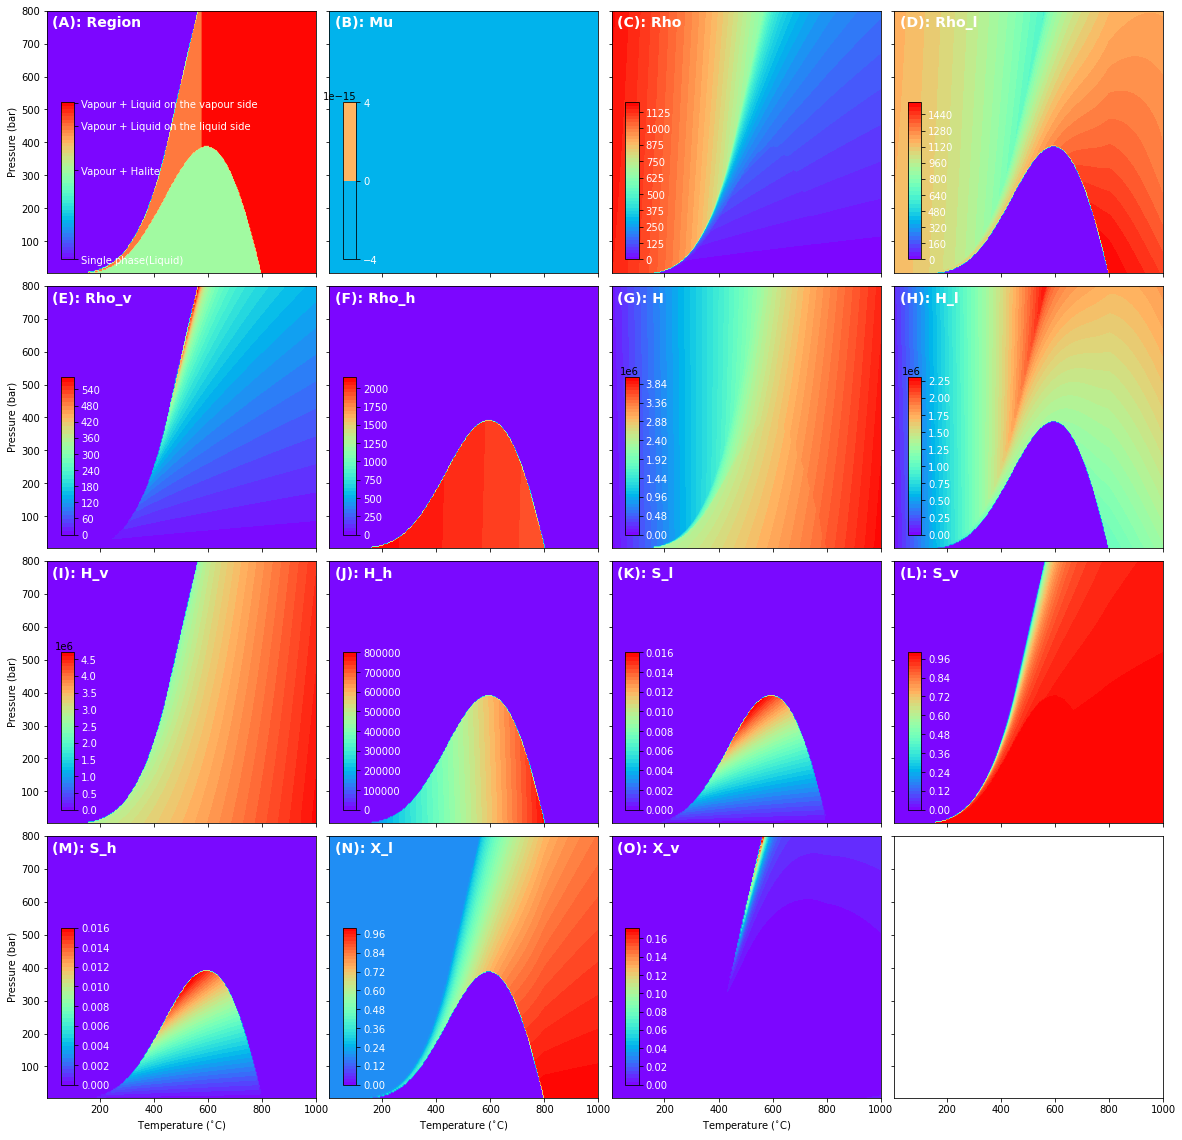

In [103]:
propNames=list(prop.keys())
labels=string.ascii_uppercase[:len(propNames)]
figrows=int(np.ceil(np.sqrt(len(propNames))))
fig,axes=plt.subplots(figrows,figrows,sharex=True,sharey=True,gridspec_kw={"width_ratios":np.linspace(1,1,figrows),'wspace':0.05,'hspace':0.05},figsize=(5*figrows,5*figrows))
for i in range(0,len(propNames)):
    row,col=i//figrows,i%figrows
    ax=axes[row][col]
    CS=ax.contourf(TT,pp,prop[propNames[i]], cmap='rainbow',levels=50)
    ax_cb=ax.inset_axes([0.05,0.05,0.05,0.6])
    cb=plt.colorbar(CS,cax=ax_cb)
    [t.set_color('w') for t in ax_cb.yaxis.get_ticklabels()]
    ax.text(0.02,0.98,'(%s): %s'%(labels[i], propNames[i]), va='top',ha='left',fontsize=14,fontweight='bold',color='w', transform=ax.transAxes)
    if(col==0):
        ax.set_ylabel('Pressure (bar)')
    if(row==(figrows-1)):
        ax.set_xlabel('Temperature ($^{\circ}$C)')
    if(propNames[i]=='Region'):
        regions=np.unique(prop['Region'])
        cb.set_ticks(regions)
        cb.set_ticklabels([sw.getPhaseRegionName(int(index)) for index in regions ])
plt.show()